In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score,roc_curve, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
df=pd.read_csv("/Users/prabhnoorsingh/Documents/churn.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
categorical_variables=[col for col in df.columns if df[col].dtype =="object" or df[col].nunique()<= 11
                       and col != "Exited"]
categorical_variables

['Surname',
 'Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [10]:
numeric_variables=[col for col in df.columns if df[col].dtype!="object" and df[col].nunique()>11 and col!="CustomerId"]
numeric_variables

['RowNumber', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [11]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
churn=df.loc[df["Exited"]==1]
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [13]:
not_churn=df.loc[df["Exited"]==0]
not_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [14]:
not_churn['Tenure'].value_counts().sort_values()

Tenure
0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: count, dtype: int64

In [15]:
churn['Tenure'].value_counts().sort_values()

Tenure
0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: count, dtype: int64

In [16]:
not_churn['NumOfProducts'].value_counts().sort_values()

NumOfProducts
3      46
1    3675
2    4242
Name: count, dtype: int64

In [17]:
churn['NumOfProducts'].value_counts().sort_values()

NumOfProducts
4      60
3     220
2     348
1    1409
Name: count, dtype: int64

# Has Credit Card

In [18]:
not_churn['HasCrCard'].value_counts()

HasCrCard
1    5631
0    2332
Name: count, dtype: int64

In [19]:
churn['HasCrCard'].value_counts()

HasCrCard
1    1424
0     613
Name: count, dtype: int64

# Is active member

In [20]:
not_churn['IsActiveMember'].value_counts()

IsActiveMember
1    4416
0    3547
Name: count, dtype: int64

In [21]:
churn['IsActiveMember'].value_counts()

IsActiveMember
0    1302
1     735
Name: count, dtype: int64

# Geography


In [22]:
not_churn['Geography'].value_counts().sort_values()

Geography
Germany    1695
Spain      2064
France     4204
Name: count, dtype: int64

In [23]:
churn['Geography'].value_counts().sort_values()

Geography
Spain      413
France     810
Germany    814
Name: count, dtype: int64

# Gender

In [24]:
not_churn['Gender'].value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [25]:
churn['Gender'].value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64

# Numrical Variables

## Credit Score

In [26]:
not_churn['CreditScore'].describe()

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

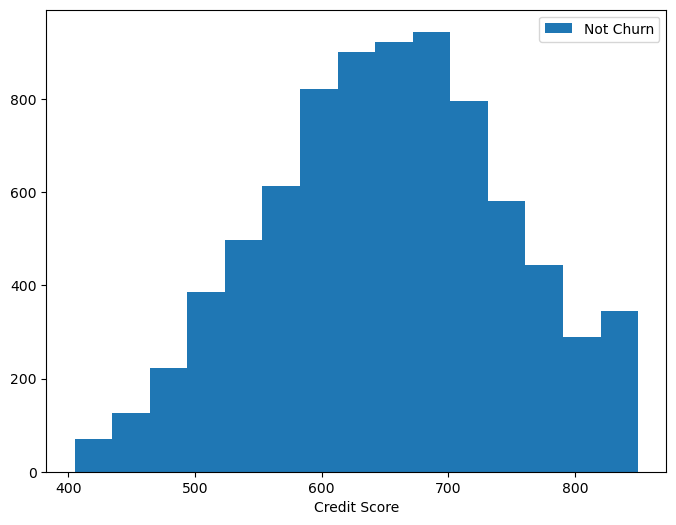

In [27]:
plt.figure(figsize=(8,6))
plt.xlabel("Credit Score")
plt.hist(not_churn['CreditScore'],bins=15,alpha=1.0,label='Not Churn')
plt.legend(loc="upper right")
plt.show()

In [28]:
churn['CreditScore'].describe()

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: CreditScore, dtype: float64

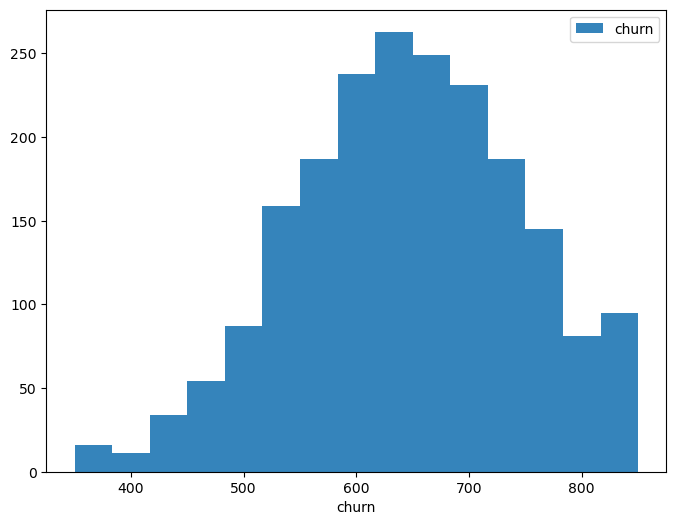

In [29]:
plt.figure(figsize=(8,6))
plt.xlabel("churn")
plt.hist(churn['CreditScore'],bins=15,alpha=0.9,label="churn")
plt.legend()
plt.show()

/Users/prabhnoorsingh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


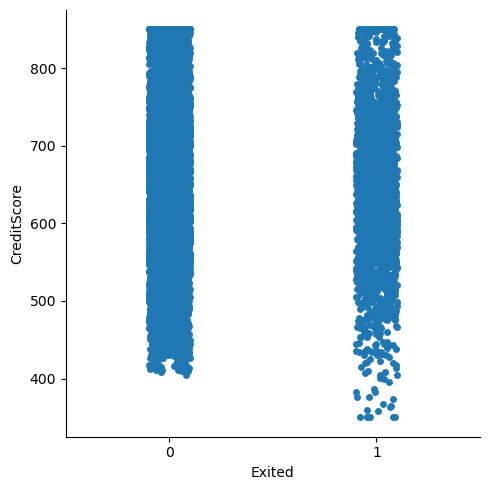

In [30]:
sns.catplot(x="Exited",y="CreditScore",data = df)

# Age

In [31]:
not_churn['Age'].describe()

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

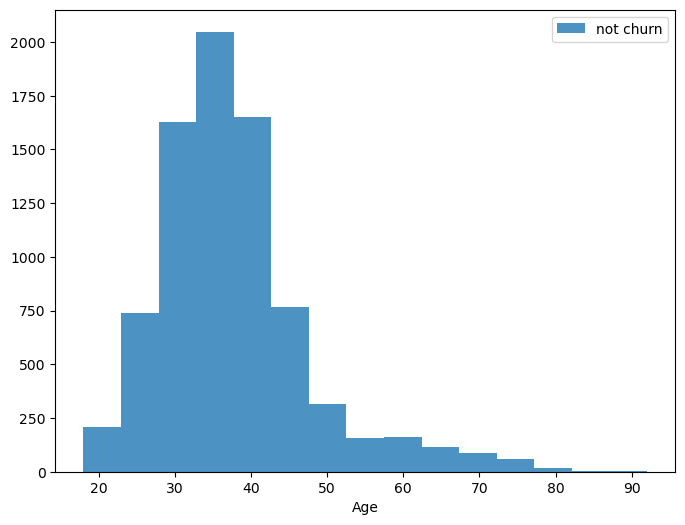

In [32]:
plt.figure(figsize=(8,6))
plt.xlabel("Age")
plt.hist(not_churn['Age'],bins=15,alpha=0.8,label="not churn")
plt.legend()
plt.show()

In [33]:
churn['Age'].describe()

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

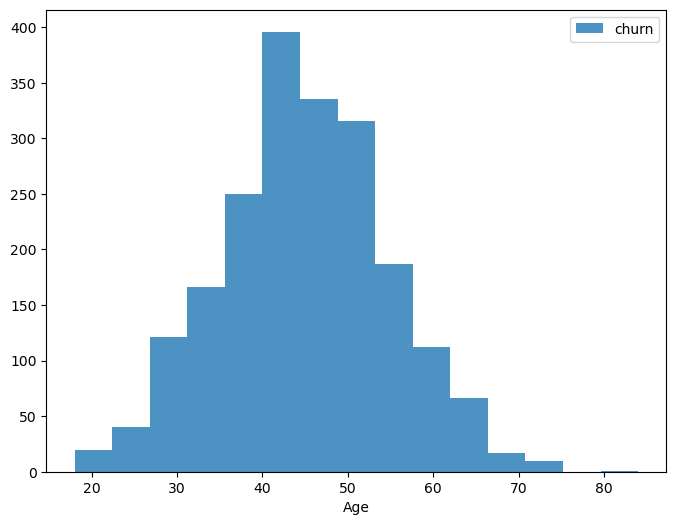

In [34]:
plt.figure(figsize=(8,6))
plt.xlabel("Age")
plt.hist(churn['Age'],bins=15,alpha=0.8,label="churn")
plt.legend()
plt.show()

/Users/prabhnoorsingh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


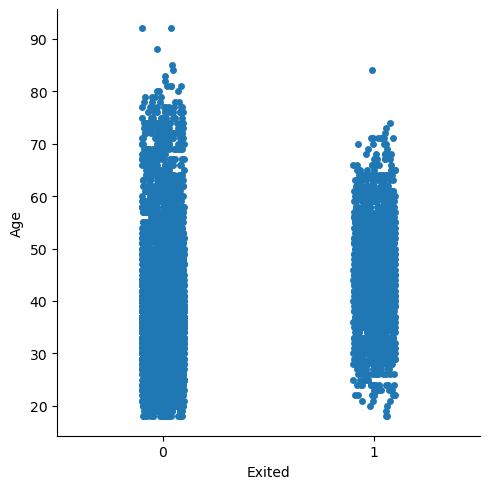

In [35]:
sns.catplot(x="Exited",y="Age",data=df)

# Balance

In [36]:
not_churn['Balance'].describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

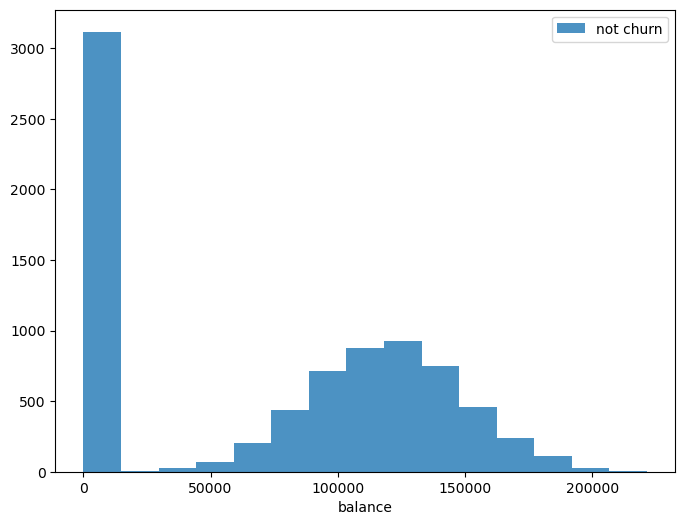

In [37]:
plt.figure(figsize=(8,6))
plt.xlabel("balance")
plt.hist(not_churn['Balance'],bins=15,alpha=0.8,label="not churn")
plt.legend()
plt.show()

In [38]:
churn['Balance'].describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

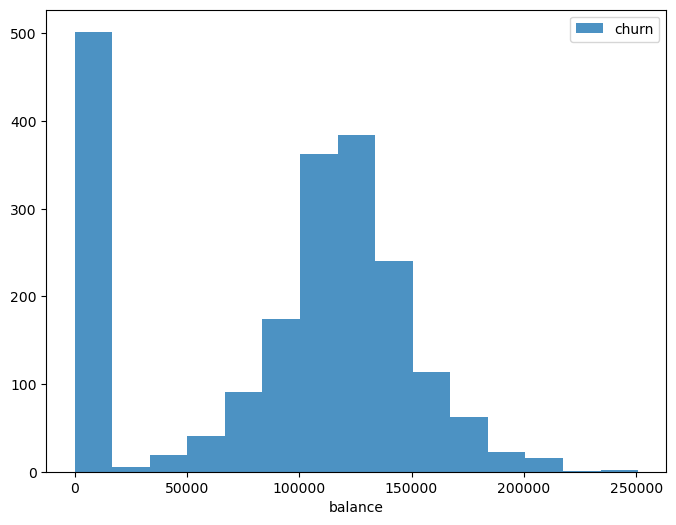

In [39]:
plt.figure(figsize=(8,6))
plt.xlabel("balance")
plt.hist(churn['Balance'],bins=15,alpha=0.8,label="churn")
plt.legend()
plt.show()

In [40]:
not_churn['EstimatedSalary'].describe()

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: EstimatedSalary, dtype: float64

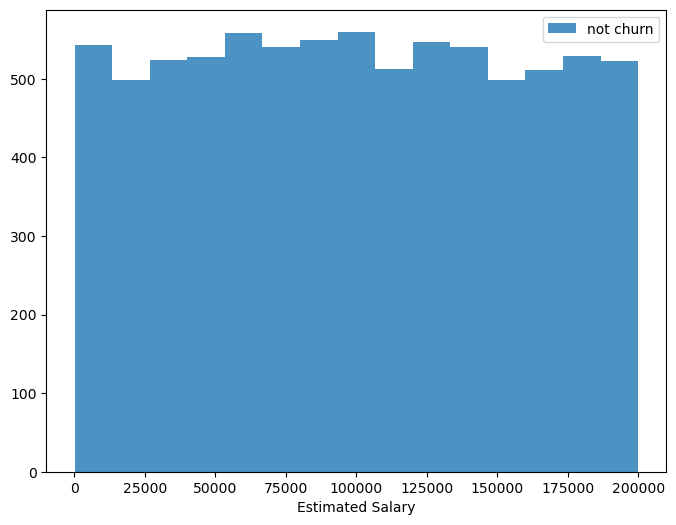

In [41]:
plt.figure(figsize=(8,6))
plt.xlabel("Estimated Salary")
plt.hist(not_churn['EstimatedSalary'],bins=15,alpha=0.8,label="not churn")
plt.legend()
plt.show()

In [42]:
churn['EstimatedSalary'].describe()

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: EstimatedSalary, dtype: float64

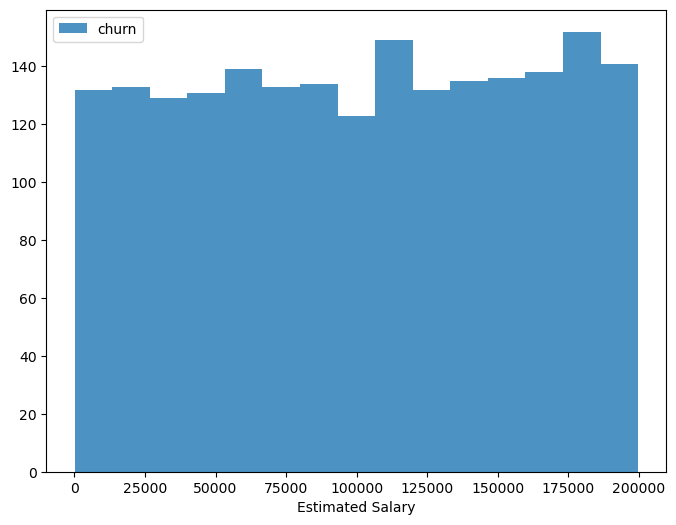

In [43]:
plt.figure(figsize=(8,6))
plt.xlabel("Estimated Salary")
plt.hist(churn['EstimatedSalary'],bins=15,alpha=0.8,label="churn")
plt.legend()
plt.show()

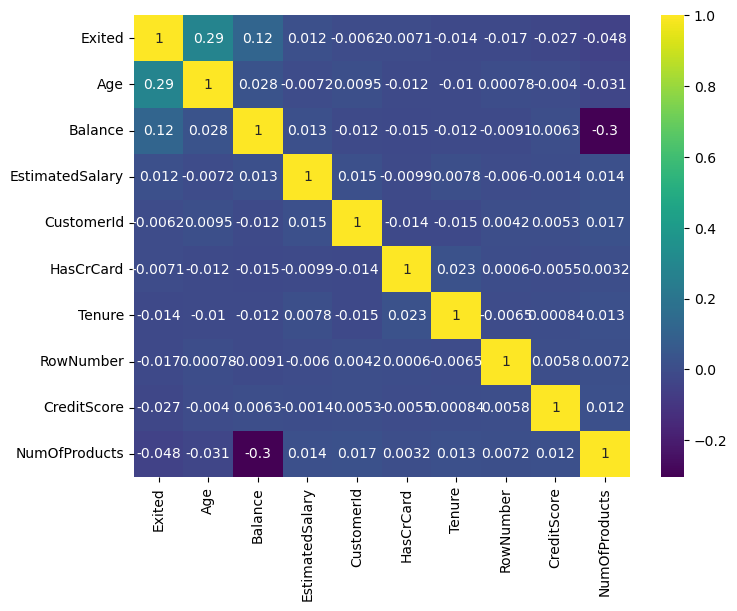

In [44]:
#correlation matrix
numeric_df=df.select_dtypes(include=[float,int])
k=10
cols =numeric_df.corr().nlargest(k,'Exited')['Exited'].index
cm=numeric_df[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

In [45]:
def outlier_threshold(dataframe,variable,low_quantile=0.05,up_quantile=0.95):
    quantile_one=dataframe[variable].quantile(low_quantile)
    quantile_three=dataframe[variable].quantile(up_quantile)
    interquantile_range=quantile_three-quantile_one
    up_limit=quantile_three+ 1.5 * interquantile_range
    low_limit=quantile_one- 1.5 * interquantile_range
    return low_limit,up_limit
    

In [46]:
def has_outliers(dataframe,numeric_cols):
#     variable_names=[]
    for col in numeric_cols:
        low_limit,up_limit=outlier_threshold(dataframe,col)
        
        if dataframe[(dataframe[col]>up_limit) | (dataframe[col]<low_limit)].any(axis=None):
            
            number_of_outliers=dataframe[(dataframe[col]>up_limit) | (dataframe[col]<low_limit)].shape[0]
            print(col,":",number_of_outliers,"outliers")
        
        
#         if outliers.shape[0]>0:
#             print(f"{col}:{outlier.shape[0]} outliers")

In [47]:
for var in numeric_variables:
    print(var,"has ",has_outliers(df,[var]),"Outliers")

RowNumber has  None Outliers
CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


## Feature Engineering

In [48]:
df["NewTenure"]=df["Tenure"]/df["Age"]
df["NewCreditScore"]=pd.qcut(df["CreditScore"],6,labels=[1,2,3,4,5,6])
df["NewAgeScore"]=pd.qcut(df['Age'],8,labels=[1,2,3,4,5,6,7,8])
df["NewBalanceScore"]=pd.qcut(df['Balance'].rank(method="first"),5,labels=[1,2,3,4,5])
df["NewEstSalaryScore"]=pd.qcut(df['EstimatedSalary'],10,labels=[1,2,3,4,5,6,7,8,9,10])


In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4


## One Hot Encoding

In [50]:
list=["Gender","Geography"]
df=pd.get_dummies(df,columns=list,drop_first=False)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,NewTenure,NewCreditScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,0.047619,3,6,1,6,True,False,True,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,0.024390,2,6,3,6,True,False,False,False,True
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,0.190476,1,6,5,6,True,False,True,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,0.025641,5,5,1,5,True,False,True,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,0.046512,6,6,4,4,True,False,False,False,True


In [51]:
df=df.drop(["CustomerId","Surname"],axis=1)

In [52]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,True,False,True,False,False
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,True,False,False,False,True
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,True,False,True,False,False
3,4,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,True,False,True,False,False
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,True,False,False,False,True


## Scaling

In [53]:
def robust_scaler(variable):
    var_median=variable.median()
    quantile1=variable.quantile(0.25)
    quantile3=variable.quantile(0.75)
    interquantile_range=quantile3-quantile1
    if int(interquantile_range)==0:
        quantile1=variable.quantile(0.05)
        quantile3=variable.quantile(0.95)
        interquantile_range=quantile3-quantile1
        if int(interquantile_range)==0:
            quantile1=variable.quantile(0.01)
            quantile3=variable.quantile(0.99)
            interquantile_range=quantile3-quantile1
            z= (variable-var_median)/interquantile_range
            return round(z,3)
        z= (variable-var_median)/interquantile_range
        return round(z,3)
    else:
        z=(variable-var_median)/interquantile_range
        return round(z,3)

In [54]:
new_cols_ohe=["Gender_Male","Gender_Female","Geography_Spain","Geography_Germany","Geography_France"]
like_num=[col for col in df.columns if df[col].dtype!="object" and len(df[col].value_counts())<=10]
cols_need_scale=[col for col in df.columns if col not in new_cols_ohe
                and col not in "Exited"
                and col not in like_num]
for col in cols_need_scale:
    df[col]=robust_scaler(df[col])
    

In [55]:
df=df.drop("RowNumber",axis=1)

In [56]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,-0.217,3,6,1,6,True,False,True,False,False
1,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,-0.279,2,6,3,6,True,False,False,False,True
2,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,0.164,1,6,5,6,True,False,True,False,False
3,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,-0.276,5,5,1,5,True,False,True,False,False
4,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,-0.220,6,6,4,4,True,False,False,False,True


## Modeling

In [60]:
X=df.drop("Exited",axis=1)
y=df["Exited"]

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12345)

models=[('LR', LogisticRegression(random_state=12345)),
       ('KNN',KNeighborsClassifier()),
       ('CART',DecisionTreeClassifier(random_state=12345)),
       ('RF',RandomForestClassifier(random_state=12345)),
       ('SVR',SVC(gamma='auto',random_state=12345)),
       ('GB',GradientBoostingClassifier(random_state=12345))
       #('LGBM',LGBGMClassifier(random_state=12345) 
        ]
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,X,y,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"%(name, cv_results.mean(),cv_results.std())
    print(msg)

/Users/prabhnoorsingh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/prabhnoorsingh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

LR: 0.823900 (0.009823)
KNN: 0.816200 (0.011196)
CART: 0.782600 (0.008651)
RF: 0.862400 (0.007473)
SVR: 0.845900 (0.009638)
GB: 0.864800 (0.009474)


In [72]:
model_GB=GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train,y_train)
y_pred=model_GB.predict(X_test)
conf_mat=confusion_matrix(y_pred,y_test)
print(conf_mat)

[[1522  228]
 [  51  199]]


In [75]:
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1750
           1       0.47      0.80      0.59       250

    accuracy                           0.86      2000
   macro avg       0.72      0.83      0.75      2000
weighted avg       0.90      0.86      0.88      2000



In [84]:
lgb_model=LGBMClassifier()
#model tuning
lgbm_params={
    'colsample_bytree':0.5,
    'learning_rate':0.01,
    'max_depth':6,
    'n_estimators':500
}
lgbm_tuned=LGBMClassifier(**lgbm_params).fit(X,y)

[LightGBM] [Info] Number of positive: 2037, number of negative: 7963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203700 -> initscore=-1.363328
[LightGBM] [Info] Start training from score -1.363328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [94]:
gbm_model=GradientBoostingClassifier()
gbm_params={
    'learning_rate':0.01,
    'n_estimators':500,
    'max_depth':6,
    'subsample':1
}
gbm_tuned=GradientBoostingClassifier(**gbm_params).fit(X,y)

In [96]:
models=[("LightGBM",lgbm_tuned),
       ("GB",gbm_tuned)]
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_score=cross_val_score(model,X,y,cv=10,scoring='accuracy')
    results.append(cv_score)
    names.append(name)
    msg= " %s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

[LightGBM] [Info] Number of positive: 1833, number of negative: 7167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203667 -> initscore=-1.363533
[LightGBM] [Info] Start training from score -1.363533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [103]:
for name,model in models:
    base=model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc_score=accuracy_score(y_test,pred)
    print(pred)
    print(acc_score*100)\
    

[LightGBM] [Info] Number of positive: 1610, number of negative: 6390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201250 -> initscore=-1.378500
[LightGBM] [Info] Start training from score -1.378500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 